# Import library

In [ ]:
!pip install PySastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Function to stem and stopword removal

In [ ]:
stop = []
with  open('/content/drive/MyDrive/Bangkit/stopword.txt') as f:
    csv_file = csv.reader(f)
    for word in csv_file:
        stop.append(word[0])

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
print(stop)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
dictionary = ArrayDictionary(stop)
stopword = StopWordRemover(dictionary)

# Preprocess Dataset

## Stem and Stopword removal

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/Bangkit/news.csv', sep=";")
dataset['berita_preprocessed'] = dataset.apply(lambda x:  stopword.remove(stemmer.stem(x['berita'])), axis=1)
dataset['class'] = dataset['tagging'].replace({'Valid':1, 'Hoax':0})
dataset.drop_duplicates(subset='berita_preprocessed', inplace=True)
dataset.drop(columns=['berita', 'tagging'], inplace=True)
dataset
# dataset.to_csv(path_or_buf='/content/preprocessed.csv',index=False)

,berita_preprocessed,class
0,jakarta jejaring sosial edar informasi lele ik...,1
1,isu ikan lele kandung sel kanker jejaring soci...,1
2,nikmat kuliner bahan dasar ikan lele berita su...,1
3,ikan lele rupa salah makan favorit indonesia h...,1
4,ikan lele rupa bahan makan populer indonesia s...,1
...,...,...
593,kabar edar putar rencana gaji presiden wakil p...,1
594,kepala biro pers media informasi sekretariat p...,1
597,edar berita nyata gaji presiden wakil presiden...,1
598,rancang atur perintah rpp gaji tunjang pegawai...,1


# Tokenizer the dataset

## Initialize variable for tokenizer

In [ ]:
vocab_size = 3000
embedding_dim = 16
max_length = 4610
trunc_type='pre'
oov_tok = "<OOV>"
pad_type = 'post'

## Train Set

In [ ]:
trainset = pd.read_csv(r'/content/drive/MyDrive/Bangkit/trainset.csv')
trainset_x = trainset['berita_preprocessed'].to_list()
trainset_y = trainset['class'].to_numpy()
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(trainset_x)
trainset_x_seq = tokenizer.texts_to_sequences(trainset_x)
trainset_padded = pad_sequences(trainset_x_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
print(trainset_padded)

[[ 209  800 1028 ...    0    0    0]
 [  21   30  141 ...    0    0    0]
 [ 156   12  106 ...    0    0    0]
 ...
 [   1 1101  619 ...    0    0    0]
 [   9   54   20 ...    0    0    0]
 [  21   26  172 ...    0    0    0]]


## Validation Set

In [ ]:
valset = pd.read_csv(r'/content/drive/MyDrive/Bangkit/valset.csv')
valset_x = valset['berita_preprocessed'].to_list()
valset_y = valset['class'].to_numpy()
valset_x_seq = tokenizer.texts_to_sequences(valset_x)
valset_padded = pad_sequences(valset_x_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
print(valset_padded)

[[  30  230  249 ...    0    0    0]
 [   1    1    1 ...    0    0    0]
 [ 408  252  112 ...    0    0    0]
 ...
 [ 311   27   61 ...    0    0    0]
 [ 143 1716  264 ...    0    0    0]
 [  51  111  177 ...    0    0    0]]


## Test Set

In [ ]:
testset = pd.read_csv(r'/content/drive/MyDrive/Bangkit/testset.csv')
testset_x = testset['berita_preprocessed'].to_list()
testset_y = testset['class'].to_numpy()
testset_x_seq = tokenizer.texts_to_sequences(testset_x)
testset_padded = pad_sequences(testset_x_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
print(testset_padded)

[[  95    3    2 ...    0    0    0]
 [ 183   42  211 ...    0    0    0]
 [  67   54    3 ...    0    0    0]
 ...
 [  11   44  303 ...    0    0    0]
 [1474   21  401 ...    0    0    0]
 [  37   21  586 ...    0    0    0]]


# Deep Learning

## Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(14)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4610, 16)          48000     
_________________________________________________________________
bidirectional (Bidirectional (None, 28)                3472      
_________________________________________________________________
dense (Dense)                (None, 8)                 232       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 51,785
Trainable params: 51,785
Non-trainable params: 0
_________________________________________________________________


## Train

In [ ]:
num_epochs = 15
history = model.fit(trainset_padded, trainset_y, epochs=num_epochs, validation_data=(valset_padded, valset_y))

Epoch 1/15
15/15 [==============================] - 8s 255ms/step - loss: 0.6865 - accuracy: 0.6110 - val_loss: 0.6741 - val_accuracy: 0.6271
Epoch 2/15
15/15 [==============================] - 3s 207ms/step - loss: 0.6677 - accuracy: 0.6110 - val_loss: 0.6507 - val_accuracy: 0.6271
Epoch 3/15
15/15 [==============================] - 3s 207ms/step - loss: 0.6326 - accuracy: 0.6110 - val_loss: 0.5949 - val_accuracy: 0.6271
Epoch 4/15
15/15 [==============================] - 3s 209ms/step - loss: 0.5627 - accuracy: 0.6110 - val_loss: 0.5737 - val_accuracy: 0.6271
Epoch 5/15
15/15 [==============================] - 3s 209ms/step - loss: 0.5031 - accuracy: 0.6321 - val_loss: 0.5196 - val_accuracy: 0.7797
Epoch 6/15
15/15 [==============================] - 3s 209ms/step - loss: 0.4378 - accuracy: 0.8499 - val_loss: 0.4785 - val_accuracy: 0.8136
Epoch 7/15
15/15 [==============================] - 3s 209ms/step - loss: 0.4020 - accuracy: 0.9027 - val_loss: 0.4914 - val_accuracy: 0.7797
Epoch 

## Graph

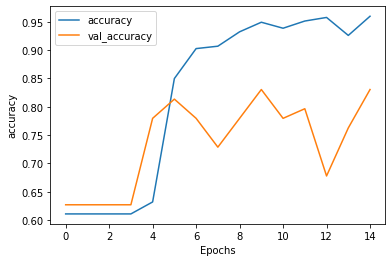

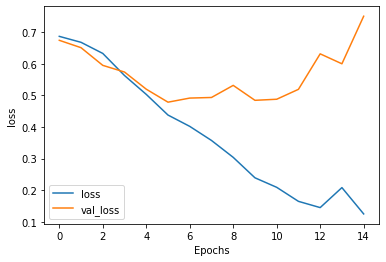

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
results = model.evaluate(testset_padded, testset_y)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 154ms/step - loss: 0.7701 - accuracy: 0.7458
test loss, test acc: [0.770112156867981, 0.7457627058029175]


In [ ]:
print(testset_padded[0].tolist())
print(testset_y[0])

[95, 3, 2, 16, 71, 82, 697, 2460, 67, 547, 547, 101, 583, 95, 1576, 371, 3, 2, 298, 415, 34, 1, 724, 371, 3, 2, 60, 1447, 1, 21, 30, 2, 16, 82, 1, 203, 3, 2, 203, 899, 1900, 3, 899, 793, 532, 2, 1749, 60, 144, 292, 173, 70, 246, 1, 581, 86, 208, 667, 70, 570, 2, 111, 823, 466, 183, 95, 705, 424, 3, 2, 16, 970, 71, 82, 95, 324, 231, 17, 31, 547, 547, 95, 1, 176, 3, 2, 741, 1832, 568, 367, 741, 1985, 3, 2, 741, 568, 95, 58, 60, 176, 3, 2, 1, 1, 367, 3, 2, 197, 1, 741, 176, 3, 2, 1832, 54, 583, 48, 67, 55, 60, 3, 2, 176, 2, 648, 88, 2, 1832, 62, 1, 1, 475, 37, 2, 16, 71, 82, 1207, 829, 2, 527, 367, 974, 175, 1232, 3, 2, 104, 191, 781, 74, 9, 1985, 3, 2, 1184, 741, 1, 1, 568, 3, 2, 307, 35, 1404, 3, 360, 197, 1925, 513, 726, 197, 741, 48, 3, 2, 16, 71, 82, 1299, 742, 55, 1747, 1047, 742, 1, 1985, 607, 1, 1, 296, 2160, 2324, 1, 1, 507, 1, 191, 781, 74, 310, 95, 475, 67, 717, 71, 82, 16, 3, 2, 67, 1463, 3, 2, 527, 698, 360, 501, 203, 188, 71, 82, 759, 820, 820, 3, 2, 293, 71, 82, 55, 820, 1,

In [ ]:
model.predict([testset_padded[0].tolist()])

array([[0.99675816]], dtype=float32)

In [ ]:
tf.keras.models.save_model(model, '/content/val83-75percent')
!zip -r /content/val83-75percent.zip /content/val83-75percent

INFO:tensorflow:Assets written to: /content/val83-75percent/assets


INFO:tensorflow:Assets written to: /content/val83-75percent/assets


  adding: content/val83-75percent/ (stored 0%)
  adding: content/val83-75percent/assets/ (stored 0%)
  adding: content/val83-75percent/keras_metadata.pb (deflated 90%)
  adding: content/val83-75percent/saved_model.pb (deflated 90%)
  adding: content/val83-75percent/variables/ (stored 0%)
  adding: content/val83-75percent/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/val83-75percent/variables/variables.index (deflated 67%)
